Creating database and tables...
✅ Sample data inserted successfully.

Running sales analysis...

=== SALES BY PRODUCT ===
product  total_quantity  total_revenue  avg_price
  Phone              19       13299.81     699.99
 Laptop               8        7999.92     999.99
 Tablet              12        4199.88     349.99
Monitor              16        3999.84     249.99

=== OVERALL SALES SUMMARY ===
Total Quantity Sold: 55.0
Total Revenue: $29,499.45
Unique Products Sold: 4.0


<Figure size 1000x500 with 0 Axes>

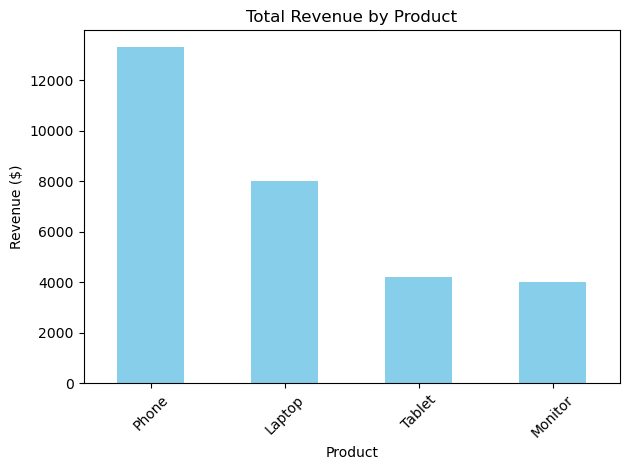

In [18]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

def create_database():
    """Create the database and sales table with sample data"""
    conn = None
    try:
        conn = sqlite3.connect('sales_data.db')
        cursor = conn.cursor()
        
        # Create sales table - properly formatted as a string
        cursor.execute('''
            CREATE TABLE IF NOT EXISTS sales (
                id INTEGER PRIMARY KEY AUTOINCREMENT,
                product TEXT NOT NULL,
                quantity INTEGER NOT NULL,
                price REAL NOT NULL,
                sale_date TEXT,
                region TEXT
            )
        ''')
        
        # Check if table is empty
        cursor.execute("SELECT COUNT(*) FROM sales")
        if cursor.fetchone()[0] == 0:
            # Insert sample data
            sample_data = [
                ('Laptop', 5, 999.99, '2023-01-15', 'North'),
                ('Phone', 12, 699.99, '2023-01-15', 'South'),
                ('Tablet', 8, 349.99, '2023-01-16', 'East'),
                ('Laptop', 3, 999.99, '2023-01-17', 'West'),
                ('Phone', 7, 699.99, '2023-01-18', 'North'),
                ('Monitor', 10, 249.99, '2023-01-19', 'South'),
                ('Tablet', 4, 349.99, '2023-01-20', 'East'),
                ('Monitor', 6, 249.99, '2023-01-21', 'West')
            ]
            cursor.executemany('''
                INSERT INTO sales (product, quantity, price, sale_date, region)
                VALUES (?, ?, ?, ?, ?)
            ''', sample_data)
            conn.commit()
            print("✅ Sample data inserted successfully.")
        
    except sqlite3.Error as e:
        print(f"❌ Database error: {e}")
    finally:
        if conn:
            conn.close()

def analyze_sales():
    """Run sales analysis queries"""
    conn = None
    try:
        conn = sqlite3.connect('sales_data.db')
        
        # Product sales summary
        query1 = """
        SELECT 
            product, 
            SUM(quantity) AS total_quantity, 
            SUM(quantity * price) AS total_revenue,
            ROUND(AVG(price), 2) AS avg_price
        FROM sales 
        GROUP BY product
        ORDER BY total_revenue DESC
        """
        
        # Overall summary
        query2 = """
        SELECT 
            SUM(quantity) AS overall_quantity,
            SUM(quantity * price) AS overall_revenue,
            COUNT(DISTINCT product) AS unique_products
        FROM sales
        """
        
        # Execute queries
        df_products = pd.read_sql_query(query1, conn)
        df_summary = pd.read_sql_query(query2, conn)
        
        # Display results
        print("\n=== SALES BY PRODUCT ===")
        print(df_products.to_string(index=False))
        print("\n=== OVERALL SALES SUMMARY ===")
        print(f"Total Quantity Sold: {df_summary.iloc[0]['overall_quantity']}")
        print(f"Total Revenue: ${df_summary.iloc[0]['overall_revenue']:,.2f}")
        print(f"Unique Products Sold: {df_summary.iloc[0]['unique_products']}")
        
        # Create visualization
        plt.figure(figsize=(10, 5))
        df_products.plot(kind='bar', x='product', y='total_revenue', legend=False, color='skyblue')
        plt.title('Total Revenue by Product')
        plt.xlabel('Product')
        plt.ylabel('Revenue ($)')
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.savefig('sales_chart.png')
        plt.show()
        
    except sqlite3.Error as e:
        print(f"❌ Query execution error: {e}")
    finally:
        if conn:
            conn.close()

if __name__ == "__main__":
    print("Creating database and tables...")
    create_database()
    
    print("\nRunning sales analysis...")
    analyze_sales()